## Iris classification:
### Develop a ML model for classifying iris flowers based on their features using python,scikit learn and Tensorflow
### Import Libraries

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Encode the target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [7]:
# Train a Support Vector Machine (SVM)
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [8]:
# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machine:")
print(f"Accuracy: {svm_accuracy}")
print(confusion_matrix(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))


Support Vector Machine:
Accuracy: 0.9666666666666667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [9]:
# Train a Neural Network using TensorFlow
model = Sequential([
    Dense(8, input_shape=(4,), activation='relu'),
    Dense(3, activation='softmax')
])

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)


Epoch 1/50
7/7 [==============================] - 1s 34ms/step - loss: 0.4640 - accuracy: 0.8241 - val_loss: 0.6905 - val_accuracy: 0.7500
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4563 - accuracy: 0.8241 - val_loss: 0.6854 - val_accuracy: 0.7500
Epoch 3/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4488 - accuracy: 0.8241 - val_loss: 0.6806 - val_accuracy: 0.7500
Epoch 4/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4422 - accuracy: 0.8241 - val_loss: 0.6759 - val_accuracy: 0.7500
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4360 - accuracy: 0.8241 - val_loss: 0.6713 - val_accuracy: 0.7500
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4297 - accuracy: 0.8241 - val_loss: 0.6670 - val_accuracy: 0.7500
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4237 - accuracy: 0.8241 - val_loss: 0.6628 - val_accuracy: 0.7500
Epoch 8/50
7/7 [=================

In [12]:
# Evaluate the Neural Network model
nn_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print("\nNeural Network:")
print(f"Accuracy: {nn_accuracy}")


Neural Network:
Accuracy: 0.9333333373069763


In [13]:
# Plot the training history
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

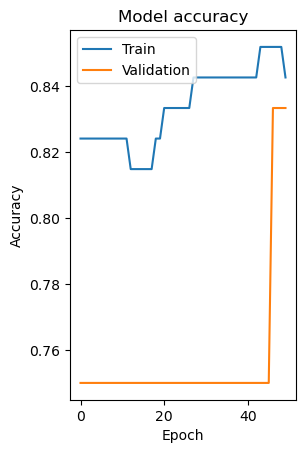

In [14]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

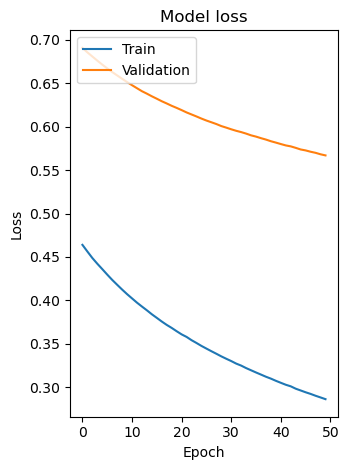

In [15]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

#### Assumptions:
Dataset Quality:

The assumption is made that the iris dataset is reliable, accurate, and representative of real-world scenarios.
Model Performance:

The assumption is that the performance metrics (accuracy, confusion matrix, classification report) are reasonable indicators of the model's effectiveness.
Generalization:

The model is assumed to generalize well to unseen data, as it is evaluated on a separate test set.